# Loan calculator

Version 1.0

## Imports

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Functions

In [32]:
def PMT(c:int =1000, r:float=1.0, per:int=1, fper:int=1):
    """ Calculates the payment for a loan based on constant payments and a constant interest rate.
    Args:
        - Pv : Present Value (starting value of the loan)
        - r : Annual Percent Rate (APR)
        - fn : fraction of period of interest periods per year
        - n : number of years
    Returns:
        float: PMT value
    """
    nper = per * fper # number of periodic payment
    pir = r / fper # Periodic Interest Rate
    PMT = (c * pir) / (1 - (1 + pir)**(-nper))

    return -PMT



def IPMT(pmt:int, r:float, per:int, fper:int, c:int):    
    """Calculate IPMT
    Args:
        - c is PMT()
        - r is Annual Rate
        - per is Payment Number
        - pv is Present Value
    Returns:
        float: IPMT value
    """
     
    pir = r / fper # Periodic Interest Rate
    
    
    IPMT = -(pmt * ((1 + pir)**(per-1) - 1) / pir + c * (1 + pir)**(per-1)) * pir

    return IPMT


def PPMT(pmt:int, r:float, per:int, fper:int, c:int):
    """Calculate PPMT
    Args:
        - c is PMT()
        - r is Rate
        - per is Payment Number
        - pv is Present Value
    Returns:
        float: PPMT value
    """
    
    pir = r / fper # Periodic Interest Rate
    
    ppmt = pmt+(pmt * ((1 + pir)**(per-1) - 1) / pir + c * (1 + pir)**(per-1)) * pir

    return ppmt

## Global Variables

In [26]:
c1 = 100000
r1 = 0.0300
fper1 = 12
per1 = 25
n1 = 300

In [34]:
pmt1 = PMT(c=c1, r=r1, per=per1, fper=fper1 ) 
ipmt1 = IPMT(pmt=pmt1, r=r1, per=n1, fper=fper1, c=Pv1) 
ppmt1 = PPMT(pmt=pmt1, r=r1, per=n1, fper=fper1, c=Pv1) 

print( pmt1 )
print( ipmt1)
print( ppmt1 )

-474.21131385767984
-1.1825718550066087
-473.02874200267325


In [48]:
def amort_able(c:int, r:float, per:int, fper:int):
    """_summary_
    Args:
        Where c is PMT()
        Where r is Rate
        Where per is Payment Number
        Where pv is Present Value
    Returns:
        _type_: _description_
    """
    
    pmt = PMT(c=c, r=r, per=per, fper=fper ) 
    
    nper = per * fper # number of periodic payment
    
    list_per = []
    list_ipmt = []
    list_ppmt = []
    
    for i in range(nper):
        
        ipmt = IPMT(pmt=pmt, r=r, per=i, fper=fper, c=c) 
        ppmt = PPMT(pmt=pmt, r=r, per=i, fper=fper, c=c) 
        
        list_per.append(i)
        list_ipmt.append(-ipmt)
        list_ppmt.append(-ppmt)
    
    return list_per, list_ipmt, list_ppmt

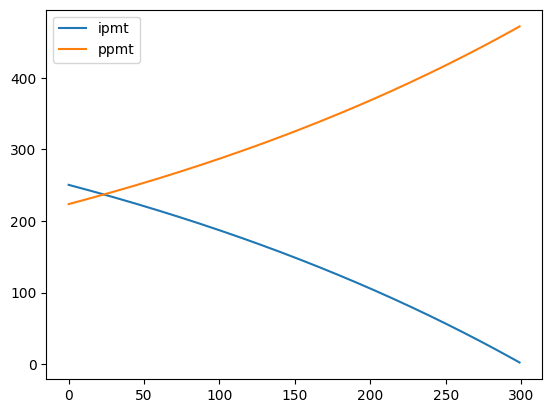

In [56]:
list_per, list_ipmt, list_ppmt = amort_able(c=c1, r=r1, per=per1, fper=fper1)


plt.plot(list_ipmt, label='ipmt')
plt.plot(list_ppmt, label='ppmt')

plt.legend();